Importing the Dependencies

In [317]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import  GradientBoostingClassifier

Data Collection & Analysis

In [318]:

parkinsons_data = pd.read_csv('parkinsons.csv')

In [319]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [320]:
parkinsons_data.shape

(195, 24)

In [321]:

parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Data Cleaning and Preprocessing

In [322]:

parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [323]:
#  statistical measures 
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [324]:

parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [325]:
# # grouping the data bas3ed on the target variable
# parkinsons_data.groupby('status').mean()


Separating the features & Target

In [326]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status'] 

In [327]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [328]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [330]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [331]:
scaler = StandardScaler()

In [332]:
scaler.fit(X_train)

StandardScaler()

In [333]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test) 

In [334]:
print(X_train) 

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Model Training

Support Vector Machine Model

In [335]:
from sklearn.svm import SVC
model = SVC(kernel='linear',probability=True)

In [336]:
# training the SVM model with training data
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [337]:
# accuracy score 
y_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [338]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


Logistic Regression


<!-- Logistic Regression -->

In [339]:

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [340]:
lr.fit(X_train, y_train)

LogisticRegression()

In [341]:
y_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [342]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8205128205128205


KNN

In [343]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [344]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [345]:
y_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [346]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7692307692307693


Random Forest

In [347]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(ccp_alpha=0.0)

In [348]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [349]:
y_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [350]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8461538461538461


Decision Tree

In [351]:

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [352]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [353]:
y_prediction = dt.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [354]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7692307692307693


LinearSVC

In [355]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

In [356]:
lsvc.fit(X_train,y_train)

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [357]:
y_prediction = lsvc.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [358]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7948717948717948


GradientBoostingClassifer

In [359]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [360]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [361]:
y_prediction = gbc.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [362]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8205128205128205


AdaBoostClassifier

In [363]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [364]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [365]:
y_prediction = abc.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_prediction)

In [366]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8974358974358975


ROC AUC

In [376]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
roc_auc

0.8185483870967742

VOTING CLASSIFIER


In [377]:
from sklearn.ensemble import VotingClassifier
# lg = LogisticRegression(max_iter=1000),
# dc = DecisionTreeClassifier(),
# rd =   RandomForestClassifier(),
# gbc =  GradientBoostingClassifier(),
# svm =   SVC()

vcl =VotingClassifier(estimators=[('svm',model),('Logis Regression',lr),('kneighbour',knn),('Random Forest',rf),('Decision Tree',dt),('Linearsvc',lsvc),('gradient Boosting',gbc),('Adob Boosting',abc)],voting='hard')
vcl.fit(X_train,y_train)
vcl_pred = vcl.predict(X_test)
print('Voting=',vcl_pred)

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Voting= [1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1]


In [378]:
vcl.fit(X_train,y_train)

c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


VotingClassifier(estimators=[('svm', SVC(kernel='linear', probability=True)),
                             ('Logis Regression', LogisticRegression()),
                             ('kneighbour', KNeighborsClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Linearsvc', LinearSVC()),
                             ('gradient Boosting',
                              GradientBoostingClassifier()),
                             ('Adob Boosting', AdaBoostClassifier())])

In [379]:
vcl.score(X_test,y_test)

0.8205128205128205

Model Selection and Benchmarking

In [381]:
best_model = AdaBoostClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.97      0.90      0.93        31

    accuracy                           0.90        39
   macro avg       0.83      0.89      0.86        39
weighted avg       0.91      0.90      0.90        39



In [382]:
from sklearn.metrics import confusion_matrix
y_predict = best_model.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 7,  1],
       [ 3, 28]], dtype=int64)

Hyperparameter Tuning

In [371]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200)

 Model Evaluation

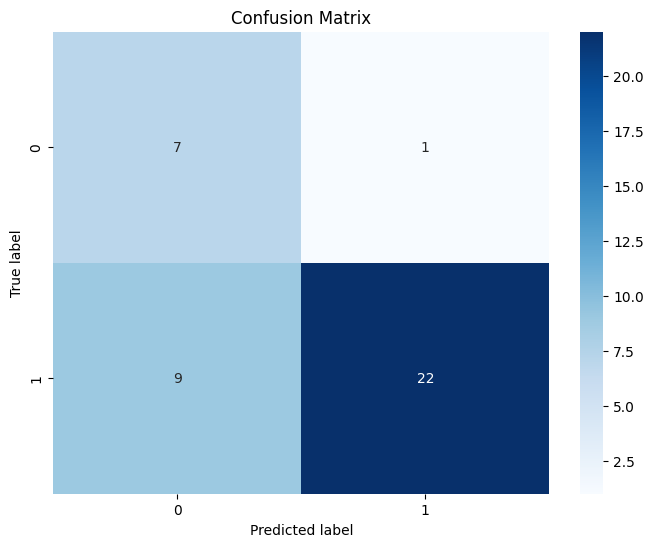

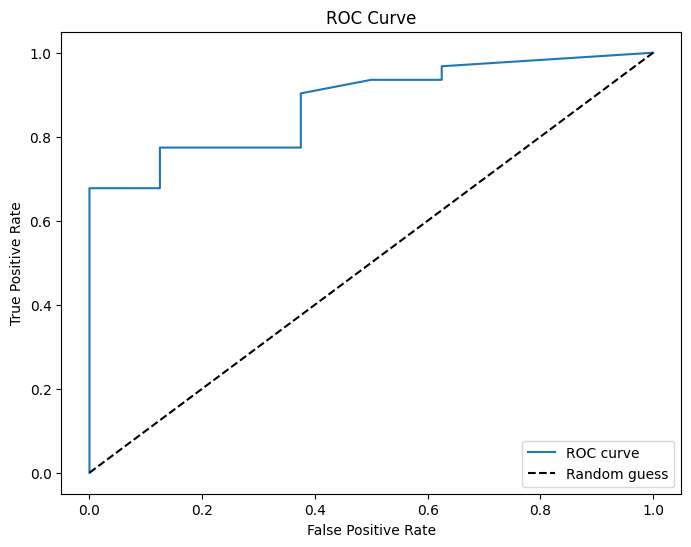

Accuracy on validation set: 0.7435897435897436
ROC AUC on validation set: 0.879032258064516

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



In [372]:
y_pred_val = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_val)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy on validation set:", accuracy_score(y_test, y_pred_val))
print("ROC AUC on validation set:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred_val))

Building a Predictive System

In [373]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


c:\Users\tahur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
